In [1]:
import boto3

In [2]:
client = boto3.resource('s3')
bucket = client.Bucket('handwrittingdetection')

In [3]:
bucket

s3.Bucket(name='handwrittingdetection')

In [4]:
files = list(bucket.objects.filter(Prefix='data/word_level/sample'))

In [5]:
files[1]

s3.ObjectSummary(bucket_name='handwrittingdetection', key='data/word_level/sample/a01/a01-000u/a01-000u-00-00.png')

In [9]:
# from PIL import Image
# plt.imshow(mpimg.imread(BytesIO(files[1].get()['Body'].read()), 'jp2'))

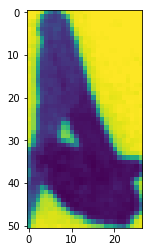

In [10]:
import boto3
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

resource = boto3.resource('s3')
bucket = resource.Bucket('handwrittingdetection')

image_object = bucket.Object('data/word_level/sample/a01/a01-000u/a01-000u-00-00.png')
image = mpimg.imread(BytesIO(image_object.get()['Body'].read()), 'jp2')

plt.imshow(image)

In [ ]:
for obj in bucket.objects.all():
    key = obj.key
    body = obj.get()['Body'].read()

In [53]:
meta = bucket.Object('data/meta_json.json')

In [59]:
import pandas as pd
meta = pd.read_json(meta.get()['Body'].read())

/Users/mattevanoff/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [60]:
meta.head()

,filename,meta,ids,pos_tag,folder,document
0,d05-040,"[Or, when, he, found, cock-fighting, going, on...","[d05-040-00-00, d05-040-00-01, d05-040-00-02, ...","[CC, WRB, PP3A, VBD, NN, VBG, RP, IN, NN, ?, N...",d05,d05-040
1,p03-151,"["", Isn't, it, ?, "", he, rose, and, smoothed, ...","[p03-151-00-00, p03-151-00-01, p03-151-00-02, ...","[*', BEZX, PP3, ?, **', PP3A, VBD, CC, VBD, PP...",p03,p03-151
10,c02-012,"[Every, unnecessary, detail, ,, all, superfluo...","[c02-012-00-00, c02-012-00-01, c02-012-00-02, ...","[AT, JJ, NN, ,, ABN, JJ, JJ, NN, MD, BE, VBN, ...",c02,c02-012
100,g06-047n,"[This, remarkable, man, of, medicine, ,, whom,...","[g06-047n-00-00, g06-047n-00-01, g06-047n-00-0...","[DT, JJ, NN, INO, NN, ,, WPO, NPT, NP, NP, VBD...",g06,g06-047
1000,a05-029,"[Sir, Francis, is, to, hand, over, to, Sir, Ri...","[a05-029-00-00, a05-029-00-01, a05-029-00-02, ...","[NPT, NP, BEZ, TO, VB, RP, IN, NPT, NP, IN21, ...",a05,a05-029


In [12]:
import os
DATA_DIR = '../../data'
# TODO move this 
data_path = os.path.join(DATA_DIR, 'raw/word_level')
meta_json_data_path = os.path.join(DATA_DIR, 'preprocessed/meta.json')
word_level_meta_path = os.path.join(DATA_DIR, 'preprocessed/word_level_meta.csv')
word_path_mapping_path = os.path.join(DATA_DIR, 'processed/word_path_mapping.pkl')
letters_path = os.path.join(DATA_DIR, 'processed/letters_map.pkl')


In [58]:
import pandas as pd
from collections import defaultdict

def absoluteFilePaths(directory):
    """Walk filepaths"""
    for dirpath,_,filenames in os.walk(directory):
        for f in filenames:
            yield os.path.join(dirpath, f)

def create_image_path(df, data_path, use_s3=True, s3_image_path='data/word_level'):
    """Create dictionary for mapping of word to data path"""
    if use_s3:
        files = list(bucket.objects.filter(Prefix='data/word_level/sample'))
        all_paths = [f.key for f in files if '.png' in f.key]
        
#         all_path_endings = [i.split('/')[-1].split('.')[0] for i in all_paths]
    else:
        all_paths = [i for i in absoluteFilePaths(data_path)]
#         print(all_paths[:10])
#         all_path_endings = [i.split('/')[-1].split('.')[0] for i in all_paths]
#         print(all_path_endings[:10])
        
    all_path_endings = [i.split('/')[-1].split('.')[0] for i in all_paths]
    all_path_dict = defaultdict(lambda: 0, dict(zip(all_path_endings, all_paths)))
#     print(all_path_dict)
    df['image_path'] = df['image_name'].map(lambda x: all_path_dict[x])
    return all_path_dict, df

meta = pd.read_json(meta_json_data_path)
word_level_df = pd.read_csv(word_level_meta_path)
# print(word_level_df.head())
all_path_dict, word_level_df = create_image_path(word_level_df, data_path)

# word_path_mapping = defaultdict(lambda: 0, dict(zip(word_level_df.token, word_level_df.image_path)))                              
# with open(os.path.join(DATA_DIR, 'processed', 'word_path_mapping.pkl'), 'wb') as f:
#     pickle.dump(word_path_mapping, f)

In [60]:
all_path_dict['a01-000u-00-00']

'data/word_level/sample/a01/a01-000u/a01-000u-00-00.png'

In [63]:
word_level_df.image_path.value_counts()

0                                                         105256
data/word_level/sample/p02/p02-150/p02-150-06-03.png           1
data/word_level/sample/p02/p02-008/p02-008-09-04.png           1
data/word_level/sample/p02/p02-131/p02-131-04-10.png           1
data/word_level/sample/a01/a01-063u/a01-063u-05-09.png         1
data/word_level/sample/a01/a01-014u/a01-014u-07-01.png         1
data/word_level/sample/a01/a01-026x/a01-026x-02-05.png         1
data/word_level/sample/j01/j01-059/j01-059-01-04.png           1
data/word_level/sample/p02/p02-121/p02-121-03-04.png           1
data/word_level/sample/j01/j01-070/j01-070-04-01.png           1
data/word_level/sample/l07/l07-190/l07-190-02-02.png           1
data/word_level/sample/a01/a01-007u/a01-007u-09-03.png         1
data/word_level/sample/a01/a01-091/a01-091-03-03.png           1
data/word_level/sample/l07/l07-131/l07-131-05-01.png           1
data/word_level/sample/a01/a01-087u/a01-087u-07-08.png         1
data/word_level/sample/b0

In [53]:
all_paths = [f.key for f in files[:5] if '.png' in f.key]
[i.split('/')[-1].split('.')[0] for i in all_paths]

['a01-000u-00-00', 'a01-000u-00-01', 'a01-000u-00-02', 'a01-000u-00-03']

In [47]:
word_path_mapping

defaultdict(<function __main__.<lambda>()>,
            {'Or': '../../data/raw/word_level/d07/d07-096/d07-096-00-00.png',
             'when': '../../data/raw/word_level/n04/n04-202/n04-202-02-04.png',
             'he': '../../data/raw/word_level/g07/g07-028a/g07-028a-01-05.png',
             'found': '../../data/raw/word_level/g06/g06-042p/g06-042p-01-06.png',
             'cock-fighting': '../../data/raw/word_level/d05/d05-040/d05-040-00-04.png',
             'going': '../../data/raw/word_level/g06/g06-011g/g06-011g-04-04.png',
             'on': '../../data/raw/word_level/g07/g07-028a/g07-028a-03-07.png',
             'in': '../../data/raw/word_level/h02/h02-037/h02-037-03-03.png',
             'church': '../../data/raw/word_level/c06/c06-000/c06-000-04-04.png',
             '?': '../../data/raw/word_level/m04/m04-131/m04-131-07-08.png',
             'Laud': '../../data/raw/word_level/d05/d05-030/d05-030-04-03.png',
             'made': '../../data/raw/word_level/r06/r06-011/r06-01

In [27]:
import boto3
from io import BytesIO
import dill as pickle


def s3_init(bucketname='handwrittingdetection'):
    client = boto3.resource('s3')
    bucket = client.Bucket(bucketname)
    return client, bucket
    
def unpickle_s3(filename, bucket=None, init=True):
    if init:
        client, bucket = s3_init()
    with BytesIO() as data:
        bucket.download_fileobj(filename, data)
        data.seek(0)
        return pickle.load(data)

In [38]:
bigram_model_path = 'data/ngram_models/bigram_likelihood_model.pkl'
trigram_model_path = 'data/ngram_models/trigram_likelihood_model.pkl'

word_path_mapping_path = 'data/word_path_mapping.pkl'
letters_path = 'data/letters_map.pkl'

bigram_model = unpickle_s3(bigram_model_path)
trigram_model = unpickle_s3(trigram_model_path)

word_path_mapping = unpickle_s3(word_path_mapping_path)
letters = unpickle_s3(letters_path)

In [41]:
word_path_mapping

defaultdict(<function __main__.<lambda>()>,
            {'Or': '../../data/raw/word_level/d07/d07-096/d07-096-00-00.png',
             'when': '../../data/raw/word_level/n04/n04-202/n04-202-02-04.png',
             'he': '../../data/raw/word_level/g07/g07-028a/g07-028a-01-05.png',
             'found': '../../data/raw/word_level/g06/g06-042p/g06-042p-01-06.png',
             'cock-fighting': '../../data/raw/word_level/d05/d05-040/d05-040-00-04.png',
             'going': '../../data/raw/word_level/g06/g06-011g/g06-011g-04-04.png',
             'on': '../../data/raw/word_level/g07/g07-028a/g07-028a-03-07.png',
             'in': '../../data/raw/word_level/h02/h02-037/h02-037-03-03.png',
             'church': '../../data/raw/word_level/c06/c06-000/c06-000-04-04.png',
             '?': '../../data/raw/word_level/m04/m04-131/m04-131-07-08.png',
             'Laud': '../../data/raw/word_level/d05/d05-030/d05-030-04-03.png',
             'made': '../../data/raw/word_level/r06/r06-011/r06-01

In [69]:
import os
import sys
import boto3

# get an access token, local (from) directory, and S3 (to) directory
# from the command-line
local_directory = '../../data/raw/word_level/'
bucket = 'handwrittingdetection' 
destination = 'data/word_level'

client = boto3.client('s3')

# enumerate local files recursively
for root, dirs, files in os.walk(local_directory):

  for filename in files:

    # construct the full local path
    local_path = os.path.join(root, filename)

    # construct the full Dropbox path
    relative_path = os.path.relpath(local_path, local_directory)
    s3_path = os.path.join(destination, relative_path)

    # relative_path = os.path.relpath(os.path.join(root, filename))

    print('Searching "%s" in "%s"' % (s3_path, bucket))
    try:
        client.head_object(Bucket=bucket, Key=s3_path)
        print("Path found on S3! Skipping %s..." % s3_path)

        # try:
            # client.delete_object(Bucket=bucket, Key=s3_path)
        # except:
            # print "Unable to delete %s..." % s3_path
    except:
        print("Uploading %s..." % s3_path)
        client.upload_file(local_path, bucket, s3_path)

Searching "data/word_level/.DS_Store" in "handwrittingdetection"
Uploading data/word_level/.DS_Store...


S3UploadFailedError: Failed to upload ../../data/raw/word_level/.DS_Store to handwrittingdetection/data/word_level/.DS_Store: An error occurred (InvalidAccessKeyId) when calling the PutObject operation: The AWS Access Key Id you provided does not exist in our records.